<a href="https://colab.research.google.com/github/jramso/Trab_BD1_2022/blob/master/Files/ColabGHHL_Contrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - GHHL Contratação - <br> - Grupo: Josué Ramos Souza, Luiz Sampaio Horta, Mateus Lannes Cunha


# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [90]:
#!pip install psycopg2-binary
#!pip install seaborn
#!pip install pandas

### Importando bibliotecas

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [92]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",
                        database="gjrcqdzu", 
                        user="gjrcqdzu", 
                        password="ztDzqw6YHKqR8XvWqzUOmohDMbtjsmt3")

In [93]:
conn

<connection object at 0x7f547d4e1590; dsn: 'user=gjrcqdzu password=xxx dbname=gjrcqdzu host=motty.db.elephantsql.com', closed: 0>

# 6. Modelo lógico do trabalho

![Alt text](https://github.com/jramso/Trab_BD1_2022/blob/master/images/GHHL.png?raw=true "Modelo Logico")

# 7. Modelo físico

### CREATE E ALTER [TABLE]
```sql
-- Active: 1667587040170@@127.0.0.1@5432@postgres@public
/* GHHL_Logico: */

CREATE TABLE USUARIO (
    id SERIAL PRIMARY KEY,
    nome VARCHAR(50),
    data_nasc date
);

CREATE TABLE VAGA (
    ID SERIAL PRIMARY KEY,
    carga_horaria Integer,
    FK_GESTOR_Id integer,
    FK_CARGO Integer,
    FK_AREA Integer
);

CREATE TABLE CANDIDATO (
    descricao VARCHAR(50),
    qualificacao VARCHAR(50),
    id_candidato Integer,
    FK_USUARIO_id Integer,
    PRIMARY KEY (id_candidato)
);
CREATE TABLE GESTOR (
    Id SERIAL PRIMARY KEY,
    email VARCHAR(50),
    FK_USUARIO_id Integer,
    id_tipo Integer
);

CREATE TABLE CARGO (
    id SERIAL PRIMARY KEY,
    nomeCargo VARCHAR(50)
);

CREATE TABLE BAIRRO (
    id SERIAL PRIMARY KEY,
    nome_bairro VARCHAR(50)
);

CREATE TABLE CIDADE (
    id Serial PRIMARY KEY,
    nome_cidade VARCHAR(50)
);

CREATE TABLE ENDERECO (
    id SERIAL PRIMARY KEY,
    cep varchar(10),
    numero Integer,
    FK_CIDADE_id Integer,
    FK_BAIRRO_id Integer,
    FK_ESTADO_id Integer,
    FK_PAIS_id Integer,
    FK_LOGRADOURO_id Integer
);

CREATE TABLE AREA (
    id Serial PRIMARY KEY,
    nome_area VARCHAR(50)
);

CREATE TABLE LOGRADOURO (
    id SERIAL PRIMARY KEY,
    nome VARCHAR(50),
    complemento VARCHAR(50),
    FK_TIPO_LOGRADOURO Integer
);

CREATE TABLE Possui (
    fk_USUARIO_id Integer,
    fk_ENDERECO_FILIAL_PAIS_id integer
);

CREATE TABLE TIPO_LOGRADOURO (
    id SERIAL PRIMARY KEY,
    nome_tipo VARCHAR(50),
    abreviatura VARCHAR(50)
);

CREATE TABLE ESTADO (
    id SERIAL PRIMARY KEY,
    nome_estado VARCHAR(50)
);

CREATE TABLE FILIAL (
    id SERIAL PRIMARY KEY,
    telefone_fixo VARCHAR(50),
    nome_fantasia VARCHAR(50),
    FK_ENDERECO Integer,
    FK_GESTOR Integer
);

CREATE TABLE PAIS (
    id SERIAL PRIMARY KEY,
    nome_pais VARCHAR(50)
);

CREATE TABLE CONCORRE (
    id SERIAL PRIMARY KEY,
    FK_CANDIDATO Integer,
    FK_VAGA Integer
);

CREATE TABLE TIPO_GESTOR (
    id_tipo SERIAL PRIMARY KEY,
    nome_tipo VARCHAR(50)
);
/*FOREIGN KEYS de CARGO,AREA,GESTOR para VAGA*/
ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_2
    FOREIGN KEY (FK_CARGO)
    REFERENCES CARGO (id);

ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_1
    FOREIGN KEY (FK_AREA)
    REFERENCES AREA (id);
ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_3
    FOREIGN KEY (FK_GESTOR_ID)
    REFERENCES GESTOR (ID);

/*FK de Usuario para candidato*/
ALTER TABLE CANDIDATO ADD CONSTRAINT FK_CANDIDATO_1
    FOREIGN KEY (FK_USUARIO_id)
    REFERENCES USUARIO (id)
    ON DELETE CASCADE;

/*FK de USUARIO,TIPO_GESTOR para GESTOR*/
ALTER TABLE GESTOR ADD CONSTRAINT FK_GESTOR_1
    FOREIGN KEY (FK_USUARIO_id)
    REFERENCES USUARIO (id);
ALTER TABLE GESTOR ADD CONSTRAINT FK_GESTOR_2
    FOREIGN KEY (id_tipo)
    REFERENCES TIPO_GESTOR (id_tipo);
 
/*FK de CIDADE,BAIRRO,ESTADO,PAIS,LOGRADOURO para ENDERECO*/
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_1
    FOREIGN KEY (FK_CIDADE_id)
    REFERENCES CIDADE (id)
    ON DELETE RESTRICT;
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_3
    FOREIGN KEY (FK_BAIRRO_id)
    REFERENCES BAIRRO (id)
    ON DELETE RESTRICT;
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_4
    FOREIGN KEY (FK_PAIS_id)
    REFERENCES PAIS (id);
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_5
    FOREIGN KEY (FK_ESTADO_id)
    REFERENCES ESTADO (id);
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_6
    FOREIGN KEY (FK_LOGRADOURO_id)
    REFERENCES LOGRADOURO (id);
 
/*FK de TIPO_LOGRADOURO para LOGRADOURO*/
ALTER TABLE LOGRADOURO ADD CONSTRAINT FK_LOGRADOURO_2
    FOREIGN KEY (FK_TIPO_LOGRADOURO)
    REFERENCES TIPO_LOGRADOURO (id);
 
/*altera o nome da tabela POSSUI para USUARIO_ENDERECO*/
ALTER TABLE POSSUI RENAME TO usuario_endereco;
-- FK de usuario para usuario_endereco
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_Possui_1
    FOREIGN KEY (fk_USUARIO_id)
    REFERENCES USUARIO (id)
    ON DELETE RESTRICT;

-- renomeia a coluna de usuario_endereco
ALTER TABLE usuario_endereco 
    RENAME COLUMN fk_endereco_filial_pais_id TO fk_endereco_id;
-- FK de endereco para usuario_endereco
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_Possui_2
    FOREIGN KEY (fk_ENDERECO_id)
    REFERENCES endereco (ID);

/*FK de GESTOR,ENDERECO para FILIAL*/
ALTER TABLE FILIAL ADD CONSTRAINT FK_FILIAL_2
    FOREIGN KEY (FK_ENDERECO)
    REFERENCES ENDERECO (id);
ALTER TABLE FILIAL ADD CONSTRAINT FK_FILIAL_3
    FOREIGN KEY (FK_GESTOR)
    REFERENCES GESTOR (id);


/*Arrumar*/
/*FK de CANDIDATO,VAGA para Concorre*/

ALTER TABLE CONCORRE ADD CONSTRAINT FK_CONCORRE_2
    FOREIGN KEY (FK_CANDIDATO)
    REFERENCES candidato (id_candidato);

ALTER TABLE CONCORRE ADD CONSTRAINT FK_CONCORRE_3
    FOREIGN KEY (FK_VAGA)
    REFERENCES VAGA (id);

--if necessary
-- ALTER TABLE CANDIDATO DROP COLUMN FK_USUARIO_ID;
--ALTER TABLE candidato ADD COLUMN FK_USUARIO_id integer;
alter table estado add COLUMN FK_id_pais INTEGER;
alter table cidade add COLUMN FK_id_estado INTEGER;
alter table bairro add COLUMN FK_id_cidade INTEGER;

ALTER TABLE estado ADD CONSTRAINT FK_pais_1
    FOREIGN KEY (FK_id_pais)
    REFERENCES pais (id);

ALTER TABLE cidade ADD CONSTRAINT FK_estado_1
    FOREIGN KEY (FK_id_estado)
    REFERENCES estado (id);
ALTER TABLE bairro ADD CONSTRAINT FK_cidade_1
    FOREIGN KEY (FK_id_cidade)
    REFERENCES cidade (id);
```

# 8. Inserts no banco:


```sql
-- Active: 1667587040170@@127.0.0.1@5432@postgres@public

--alter table vaga drop CONSTRAINT FK_VAGA_1;


insert into area (nome_area)VALUES
('programacao'),
('segurança'),
('banco de dados'),
('desenvolvimento de software'),
('marketing'),
('design'),
('analista de sistemas'),
('Engenheiro'),
('analista de compras'),
('assistente fiscal');

insert into cargo (nomecargo)VALUES
('Junior'),
('Pleno'),
('Senior'),
('Master'),
('Especialista');

INSERT INTO usuario (nome,data_nasc)
VALUES
  ('Ebony Robertson','1990-06-20'),
  ('Thaddeus Wheeler','2006-05-13'),
  ('Kelly Rivas','2015-06-28'),
  ('Macon Gill','2003-03-08'),
  ('Yuri Lewis','2000-10-18'),
  ('Abdul Goff','2022-02-08'),
  ('Porter Cotton','1993-03-01'),
  ('Tad Roth','2007-01-01'),
  ('Lysandra Mclaughlin','1994-08-27'),
  ('Mariam Dennis','2006-11-03');



  
INSERT INTO pais (nome_pais)
VALUES
  ('Portugal'), --
  ('China'), --
  ('Germany'), --
  ('Indonesia'), --
  ('United Kingdom'),--
  ('France'), --
  ('México'), --
  ('Spain'), --
  ('Colombia'),
  ('Brasil'), --
  ('United States of America'); --


INSERT INTO estado (nome_estado,fk_id_pais)
VALUES 
  ('Tabasco',7), -- Mexico ++
  ('Maranhão',10), -- Brasil ++
  ('Baja California',7), -- México ++
  ('Puebla',7), -- MExico ++
  ('Colorado',11), -- EUA ++
  ('Minnesota')11, -- EUA ++
  ('Dōngběi',2), -- China ++
  ('São Paulo',10), --Brasil ++
  ('Utah',11), -- EUA ++
  ('Michoacán',7), -- Mexico 
  ('Catalunha',8), -- portugal ++
  ('Baviera',3), --Alemanha ++
  ('Suffolk',5), -- Reino Unido - Inglaterra ++
  ('Córsega',6), -- França ++
  ('Java',4), -- Indonésia ++
  ('Lisboa',1), --portugal ++
  ('Boyacá',9), -- Colombia ++
  ('California',11); -- EUA ++




INSERT INTO cidade (nome_cidade, fk_id_estado)
VALUES
  ('Tunja',17), -- COLOMBIA capital de [BOYACA] ++++
  ('Denver',5), -- EUA Capital do [Colorado] ++++
  ('Villahermosa',1),--MEXICO Capital de [TABASCO] ++++
  ('Munique',12), -- ALEMANHA Capital de [Baviera] ++++
  ('Ipswich',13), -- UK INGLATERRA centro Adiministrativo de [Suffolk]++
  ('São paulo',8), -- Brasil capital de [SAO PAULO] ++++
  ('Jacarta',15), --INDONESIA capital de [JAVA]++++
  ('Ajaccio',14), -- FRANÇA capital de [CORSEGA] ++++(Cidade de napoleao)
  ('Lisboa',16), -- PORTUGAL capital de [LISBOA] ++++
  ('São Luís',2), -- BRASIL capital do [MARANHÃO] ++
  ('Puebla',4), -- MÉXICO capital de [PUEBLA]++
  ('Mexicali',3), -- MÉXICO capital de [BAJA CALIFORNIA] ++
  ('Saint Paul',6), -- EUA capital de [MINESSOTA] ++++
  ('Shenyang',7), -- CHINA capital de [DONGBEI] ++
  ('Salt Lake City',9), --EUA capital de [UTAH] ++
  ('Sacramento',18), --EUA capital da [CALIFORNIA] ++
  ('Morélia',10),--MÉXICO capital de [MICHOACAN]
  ('Barcelona',11), --ESPANHA capital da [CATALUNHA]
  ('Los Angeles',18); -- EUA cidade da [CALIFORNIA] ++++

INSERT INTO bairro (nome_bairro, fk_id_cidade) VALUES
('Vila Mariana',16), --Sao paulo [Sao Paulo]
('Ibirapuera',16), -- Sao paulo [São paulo]
('Santo António',19), -- Portugal [Lisboa]
('Alfama',19), -- Portugal  [Lisboa]
('La choca',13),  -- Mexico [Villahermosa]
('Summit Hill',23), -- EUA Minnesota [Saint Paul]
('Chinatown',29), -- EUA California [Los angeles]
('Maldonado',11), -- COLOMBIA [Tunja]
('Lower Downtown',12), -- EUA [Denver]
('Sendling',14), -- Alemanha [Munique]
('Ipswich',15), -- UK Inglaterra [Suffolk ipswich]
('Glodok Chinatown',17), -- Indonesia JAVA [JACARTA]
('Bairro Genoves',18), -- França  Corsega [Ajaccio] 
('Renascença',20), --Brasil Maranhao[São Luís]
('Zócalo',21), -- México Puebla [PUEBLA]
('Éguia',22), --México Baja California [Mexicali]
('Tie xi',24), -- China Dongbei [Shenyang]
('Salt Lake Valley',25), -- EUA Salt Lake City [UTAH]
('River Park',26), -- EUA California [Sacramento]
('El Gòtic',28), -- Espanha barcelona [Catalunha]
('Centro Histórico',27) -- México Michoacan [morelia]
```

# 9.0 TABELAS E PRINCIPAIS CONSULTAS

## 9.1 Select das tabelas (Cada uma)

In [94]:
res = pd.read_sql_query("""select * from area """,conn)
res

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,7,analista de sistemas
6,8,Engenheiro
7,9,analista de compras
8,6,design UX


In [95]:
res = pd.read_sql_query("""select * from cargo """,conn)
res

,id,nomecargo
0,1,Junior
1,2,Pleno
2,3,Senior
3,4,Master
4,5,Especialista


In [96]:
res = pd.read_sql_query("""select * from bairro """,conn)
res

,id,nome_bairro,fk_id_cidade
0,1,Vila Mariana,16
1,2,Ibirapuera,16
2,3,Santo António,19
3,4,Alfama,19
4,5,La choca,13
5,6,Summit Hill,23
6,7,Chinatown,29
7,8,Maldonado,11
8,9,Lower Downtown,12
9,10,Sendling,14


In [97]:
res = pd.read_sql_query("""select * from cidade """,conn)
res

,id,nome_cidade,fk_id_estado
0,11,Tunja,17
1,12,Denver,5
2,13,Villahermosa,1
3,14,Munique,12
4,15,Ipswich,13
5,16,São paulo,8
6,17,Jacarta,15
7,18,Ajaccio,14
8,19,Lisboa,16
9,20,São Luís,2


In [98]:
res = pd.read_sql_query("""select * from estado """,conn)
res

,id,nome_estado,fk_id_pais
0,1,Tabasco,7
1,2,Maranhão,10
2,3,Baja California,7
3,4,Puebla,7
4,10,Michoacán,7
5,5,Colorado,11
6,6,Minnesota,11
7,9,Utah,11
8,18,California,11
9,7,Dōngběi,2


In [99]:
res = pd.read_sql_query("""select * from pais """,conn)
res

,id,nome_pais
0,1,Portugal
1,2,China
2,3,Germany
3,4,Indonesia
4,5,United Kingdom
5,6,France
6,7,México
7,8,Spain
8,9,Colombia
9,10,Brasil


In [100]:
res = pd.read_sql_query("""select * from endereco """,conn)
res

,id,postal_zip,numero,fk_cidade_id,fk_bairro_id,fk_estado_id,fk_pais_id,fk_logradouro_id
0,21,143337,1316,24,17,7,2,5
1,22,FG58 5NR,4542,15,11,13,5,1
2,23,86948,3618,12,9,5,11,1
3,24,38429,4252,29,7,18,11,1
4,25,412688,1789,24,17,7,2,1
5,29,327658,1465,14,10,12,3,1
6,26,38788-24667,1565,18,13,14,6,1
7,34,64635,3926,14,10,12,3,1
8,32,425467,4982,11,18,17,9,15
9,38,727857,2202,21,15,4,7,20


In [101]:
res = pd.read_sql_query("""select * from logradouro """,conn)
res

,id,nome,fk_id_complemento,fk_tipo_logradouro
0,1,Rua Alecrim,1,5
1,2,Venice Boulevard,2,13
2,3,Rua Branca Donadio,3,1
3,4,Venice Boulevard,4,11
4,5,Sheng Li Nan Jie,2,7
5,7,Freemont Street,1,11
6,8,16th Street Mall,4,3
7,9,16th Street Mall,4,12
8,10,Av. Calouste Gulbenkian,2,8
9,11,Venice Boulevard,3,6


In [102]:
res = pd.read_sql_query("""select * from tipo_logradouro """,conn)
res

,id,nome_tipo,abreviatura
0,1,Rodovia,R
1,2,Condomínio,CON
2,3,Viaduto,VD
3,4,Morro,MRO
4,5,Avenida,AV
5,6,Esplanada,ESP
6,7,Vila,VL
7,8,Lagoa,LGA
8,9,Pátio,PAT
9,10,Recanto,REC


In [103]:
res = pd.read_sql_query("""select * from usuario """,conn)
res

,id,nome,data_nasc
0,11,Ebony Robertson,1990-06-20
1,12,Thaddeus Wheeler,2006-05-13
2,13,Kelly Rivas,2015-06-28
3,14,Macon Gill,2003-03-08
4,15,Yuri Lewis,2000-10-18
5,16,Abdul Goff,2022-02-08
6,17,Porter Cotton,1993-03-01
7,18,Tad Roth,2007-01-01
8,19,Lysandra Mclaughlin,1994-08-27
9,20,Mariam Dennis,2006-11-03


In [104]:
res = pd.read_sql_query("""select * from usuario_endereco """,conn)
res

,fk_usuario_id,fk_endereco_id
0,13,33
1,15,23
2,18,30
3,18,22
4,20,31
5,16,29
6,15,34
7,12,23
8,15,29
9,20,32


In [105]:
res = pd.read_sql_query("""select * from candidato """,conn)
res

,descricao,id_candidato,fk_usuario_id,fk_escolaridade
0,"pede, malesuada vel, venenatis vel,",1,21,4
1,aliquam adipiscing lacus. Ut nec,2,22,4
2,"Nam ligula elit, pretium et,",3,23,3
3,Etiam gravida molestie arcu. Sed,4,24,2
4,tellus. Suspendisse sed dolor. Fusce,5,25,2
5,"felis orci, adipiscing non, luctus",6,26,3
6,Praesent eu nulla at sem,7,27,2
7,"lacus, varius et, euismod et,",8,28,4
8,"neque sed dictum eleifend, nunc",9,29,4
9,"pellentesque, tellus sem mollis dui,",10,30,3


In [106]:
res = pd.read_sql_query("""select * from gestor """,conn)
res

,id,email,fk_usuario_id,id_tipo
0,11,auctor@ghhlcontato.de,18,3
1,13,vestibulum.massa.rutrum@ghhlcontato.cn,19,2
2,14,vitae.posuere@ghhlcontato.co,15,2
3,15,aenean.eget@ghhlcontato.pt,17,2
4,17,augue.eu@ghhlcontato.de,16,2
5,18,cras.convallis@ghhlcontato.uk,11,3
6,19,egestas.lacinia@ghhlcontato.id,12,2
7,20,nec.enim@ghhlcontato.fr,13,2
8,12,fusce@ghhlcontato.br,20,1
9,16,segundo.est@ghhlcontato.cn,14,3


In [107]:
res = pd.read_sql_query("""select * from tipo_gestor """,conn)
res

,id_tipo,nome_tipo
0,1,Geral
1,2,Vagas
2,3,Filial


In [108]:
res = pd.read_sql_query("""select * from filial """,conn)
res

,id,telefone_fixo,nome_fantasia,fk_endereco,fk_gestor
0,1,3338-7731,GHHL Enterprise Ltda,35,12
1,2,726-6714,GHHL Eget Venenatis LLC,27,17
2,3,1-828-555-2009,GHHL Velit Incorporated,39,12
3,4,1-673-775-0419,GHHL Volutpat Nunc Company,37,14
4,5,1-331-248-1609,GHHL Liaoning Metus Foundation,25,16


In [109]:
res = pd.read_sql_query("""select * from vaga """,conn)
res

,id,carga_horaria,fk_gestor_id,fk_cargo,fk_area
0,1,36,14,3,8
1,3,30,20,4,3
2,4,30,18,1,2
3,6,40,17,2,3
4,7,36,17,2,4
5,8,44,16,3,6
6,9,44,17,4,5
7,10,30,18,5,8
8,2,30,14,4,1
9,5,30,13,1,8


In [110]:
res = pd.read_sql_query("""select * from concorre """,conn)
res

,id,fk_candidato,fk_vaga,data_inscricao
0,1,1,8,2011-12-05
1,2,8,1,2021-07-24
2,3,9,3,2016-01-28
3,4,7,2,2010-12-25
4,5,2,8,2014-11-27
5,6,2,3,2012-05-12
6,7,5,4,2010-07-19
7,8,9,6,2014-12-18
8,9,9,5,2009-11-27


In [111]:
res = pd.read_sql_query("""select * from area """,conn)
res

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,7,analista de sistemas
6,8,Engenheiro
7,9,analista de compras
8,6,design UX


In [112]:
res = pd.read_sql_query("""select * from cargo """,conn)
res

,id,nomecargo
0,1,Junior
1,2,Pleno
2,3,Senior
3,4,Master
4,5,Especialista


## 9.2 Consultas das tabelas com filtros `WHERE`

In [113]:
res = pd.read_sql_query("""select e.postal_zip,e.numero from endereco as e Where e.fk_pais_id=7""",conn)
res
# codigo postal e numero de endereços do México

,postal_zip,numero
0,727857,2202
1,735226,2817
2,51159,4520
3,81230,1090


In [114]:
res = pd.read_sql_query("""
select f.nome_fantasia as "Empresa",f.telefone_fixo as "Telefone", e.postal_zip as "CEP" from filial as f 
join endereco as e on(f.fk_endereco=e.id) 
Where f.fk_gestor=12
""",conn)
res
# nome da filial, telefone da filial e Cep do endereço da filial onde o id do gestor é 12

,Empresa,Telefone,CEP
0,GHHL Enterprise Ltda,3338-7731,61235-319
1,GHHL Velit Incorporated,1-828-555-2009,81230


In [115]:
res = pd.read_sql_query("""
select g.email as "email_filial", t.nome_tipo from gestor as g 
join tipo_gestor as t on(g.id_tipo = t.id_tipo)
where g.id_tipo = 3 """,conn)
res
# e-mails dos gestores de filial

,email_filial,nome_tipo
0,auctor@ghhlcontato.de,Filial
1,cras.convallis@ghhlcontato.uk,Filial
2,segundo.est@ghhlcontato.cn,Filial


In [116]:
res = pd.read_sql_query("""select c.fk_escolaridade as "escolaridade", u.nome from candidato as c
join usuario as u on (u.id = c.fk_usuario_id)
where c.fk_escolaridade = 2""",conn)
res
# Candidatos que têm escolaridade nível 2

,escolaridade,nome
0,2,Evelyn Jarvis
1,2,Cassidy Case
2,2,Isaiah Pace


## 9.4 Consultas com LIKE E DATAS (Mínimo 12)

#### Like

In [117]:
res = pd.read_sql_query("""select nome_fantasia as nome, telefone_fixo as tel 
from filial where (telefone_fixo LIKE '1%')
""",conn)
res
#seleção das filiais cujo telefone inicia com o digito 1

,nome,tel
0,GHHL Velit Incorporated,1-828-555-2009
1,GHHL Volutpat Nunc Company,1-673-775-0419
2,GHHL Liaoning Metus Foundation,1-331-248-1609


In [118]:
res = pd.read_sql_query("""select a.nome_area as area,
v.id as id_vaga, u.nome from area as a join vaga as v on (a.id = v.fk_area) join
usuario as u on(u.id = v.fk_gestor_id) where
(u.nome LIKE '%Macon Gill%' OR u.nome LIKE '%Porter Cotton%')""", conn)
res
#mostra as vagas sob responsabilidade desses dois gestores

,area,id_vaga,nome
0,Engenheiro,1,Macon Gill
1,banco de dados,6,Porter Cotton
2,desenvolvimento de software,7,Porter Cotton
3,marketing,9,Porter Cotton
4,programacao,2,Macon Gill


In [119]:
res = pd.read_sql_query("""select a.nome_area as area,
v.id as id_vaga from area as a join vaga as v on (a.id = v.fk_area)
where (a.nome_area LIKE '%Engenheiro%')""", conn)
res
#mostra as vagas abertas para Engenheiro

,area,id_vaga
0,Engenheiro,1
1,Engenheiro,10
2,Engenheiro,5


In [120]:
res = pd.read_sql_query("""select a.nome_area as area,
v.id as id_vaga from area as a join vaga as v on (a.id = v.fk_area)
where (a.nome_area NOT LIKE '%Engenheiro%')""", conn)
res
#mostra as vagas abertas exceto as de Engenheiro

,area,id_vaga
0,banco de dados,3
1,segurança,4
2,banco de dados,6
3,desenvolvimento de software,7
4,design UX,8
5,marketing,9
6,programacao,2


In [121]:
#nomes que começam com m minusculo (exemplo de Case Sensitive)
res = pd.read_sql_query("""select nome from usuario where nome like 'm%' """, conn)
res

,nome


In [122]:
#nomes que começam com a letra M (exemplo de Case Sensitive)
res = pd.read_sql_query("""select nome from usuario where nome ilike 'm%' """, conn)
res

,nome
0,Macon Gill
1,Mariam Dennis


#### Data

In [123]:
res = pd.read_sql_query("""SELECT EXTRACT (year FROM data_nasc) FROM usuario;""", conn)
res

,date_part
0,1990.0
1,2006.0
2,2015.0
3,2003.0
4,2000.0
5,2022.0
6,1993.0
7,2007.0
8,1994.0
9,2006.0


In [124]:
# mostra os usuarios que nasceram a partir do primeiro dia dos anos 2000
res = pd.read_sql_query("""SELECT nome, data_nasc FROM usuario WHERE data_nasc BETWEEN '2000-01-01' AND CURRENT_DATE;""", conn)
res

,nome,data_nasc
0,Thaddeus Wheeler,2006-05-13
1,Kelly Rivas,2015-06-28
2,Macon Gill,2003-03-08
3,Yuri Lewis,2000-10-18
4,Abdul Goff,2022-02-08
5,Tad Roth,2007-01-01
6,Mariam Dennis,2006-11-03
7,Darius Mcgowan,2001-01-11
8,Lee Lambert,2001-03-06


In [125]:
#usuarios que nasceram antes de 1995 e o nome termina com 'n'
res = pd.read_sql_query("""SELECT nome, data_nasc FROM usuario WHERE data_nasc < '1995-01-01' AND nome LIKE '%n' ;""", conn)
res

,nome,data_nasc
0,Ebony Robertson,1990-06-20
1,Porter Cotton,1993-03-01
2,Lysandra Mclaughlin,1994-08-27
3,Phelan Dillon,1987-12-01


In [126]:
#Candidatos que nasceram depois na década de 80 ou depois e se inscreveram antes de 2020
res = pd.read_sql_query("""SELECT c.id_candidato as "Candidato",co.data_inscricao as "data da Inscrição",u.nome, u.data_nasc as "nascimento" 
      FROM usuario as u 
      JOIN candidato as c on (c.fk_usuario_id=u.id) 
      JOIN concorre as co on(co.fk_candidato=c.id_candidato) 
      WHERE data_nasc > '1980-01-01'  AND co.data_inscricao <'2020-01-01' order by c.id_candidato;""", conn)
res

,Candidato,data da Inscrição,nome,nascimento
0,1,2011-12-05,Darius Mcgowan,2001-01-11
1,2,2014-11-27,Allen Avery,1980-02-21
2,2,2012-05-12,Allen Avery,1980-02-21
3,7,2010-12-25,Isaiah Pace,1999-01-27


In [127]:
# candidatos que se inscreveram em vagas após ou durante o natal de 2010
res = pd.read_sql_query("""SELECT v.id as "Nº da vaga", v.carga_horaria,c.id_candidato,  co.data_inscricao  
FROM vaga as v join concorre as co on (v.id=co.fk_vaga)
join candidato as c on (c.id_candidato=co.fk_candidato)
WHERE co.data_inscricao >='2010-12-25' order by v.id;""", conn)
res

,Nº da vaga,carga_horaria,id_candidato,data_inscricao
0,1,36,8,2021-07-24
1,2,30,7,2010-12-25
2,3,30,9,2016-01-28
3,3,30,2,2012-05-12
4,6,40,9,2014-12-18
5,8,44,1,2011-12-05
6,8,44,2,2014-11-27


In [128]:
#Período em anos desde que o candidato se inscreveu para uma determinada vaga
res = pd.read_sql_query("""SELECT co.fk_vaga as "Código da vaga",(EXTRACT(year from CURRENT_DATE)-EXTRACT(year FROM co.data_inscricao)) as "Anos após inscrição",u.nome  
FROM usuario as u join candidato as c on(u.id=c.fk_usuario_id)
join concorre as co on(co.fk_candidato=c.id_candidato) order by co.fk_vaga;""", conn)
res

,Código da vaga,Anos após inscrição,nome
0,1,1.0,Fuller Tate
1,2,12.0,Isaiah Pace
2,3,6.0,Gwendolyn Acosta
3,3,10.0,Allen Avery
4,4,12.0,Cassidy Case
5,5,13.0,Gwendolyn Acosta
6,6,8.0,Gwendolyn Acosta
7,8,8.0,Allen Avery
8,8,11.0,Darius Mcgowan


## 9.5 Instruções de atualização e exclusão (Mínimo 6)

In [129]:
#Atualiza o endereco do usuario de id:17 do endereço de id:40->38 (40 para 38)
c=conn.cursor()
c.execute(""" UPDATE  usuario_endereco set fk_endereco_id = 38 
              WHERE fk_usuario_id = 17;
""")
res = pd.read_sql_query("""select ue.*, u.nome from usuario_endereco as ue join usuario as u on (u.id=ue.fk_usuario_id) order by ue.fk_usuario_id """,conn)
conn.commit()
res
#Linha 6

,fk_usuario_id,fk_endereco_id,nome
0,12,23,Thaddeus Wheeler
1,13,33,Kelly Rivas
2,15,34,Yuri Lewis
3,15,23,Yuri Lewis
4,15,29,Yuri Lewis
5,16,29,Abdul Goff
6,17,38,Porter Cotton
7,18,22,Tad Roth
8,18,30,Tad Roth
9,20,31,Mariam Dennis


In [130]:
c =conn.cursor()
c.execute("""UPDATE VAGA
SET carga_horaria = 30
WHERE carga_horaria < 30 """)
res = pd.read_sql_query("""select * from vaga""",conn)
conn.commit()

res

# Atualiza qualquer carga horaria menor que 30 para 30

,id,carga_horaria,fk_gestor_id,fk_cargo,fk_area
0,1,36,14,3,8
1,3,30,20,4,3
2,4,30,18,1,2
3,6,40,17,2,3
4,7,36,17,2,4
5,8,44,16,3,6
6,9,44,17,4,5
7,10,30,18,5,8
8,2,30,14,4,1
9,5,30,13,1,8


In [131]:
c=conn.cursor()
c.execute("""UPDATE gestor
SET email = 'segundo.est@ghhlcontato.cn'
WHERE id = 16""")
res = pd.read_sql_query("""select * from Gestor""",conn)
conn.commit()
res
# atualiza o email de um gestor

,id,email,fk_usuario_id,id_tipo
0,11,auctor@ghhlcontato.de,18,3
1,13,vestibulum.massa.rutrum@ghhlcontato.cn,19,2
2,14,vitae.posuere@ghhlcontato.co,15,2
3,15,aenean.eget@ghhlcontato.pt,17,2
4,17,augue.eu@ghhlcontato.de,16,2
5,18,cras.convallis@ghhlcontato.uk,11,3
6,19,egestas.lacinia@ghhlcontato.id,12,2
7,20,nec.enim@ghhlcontato.fr,13,2
8,12,fusce@ghhlcontato.br,20,1
9,16,segundo.est@ghhlcontato.cn,14,3


In [132]:
c=conn.cursor()
c.execute("""UPDATE area
SET nome_area = 'design UX'
WHERE nome_area = 'design' """)
res = pd.read_sql_query("""select * from area""",conn)
conn.commit()
res
# Atualiza especificando melhor a area de design

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,7,analista de sistemas
6,8,Engenheiro
7,9,analista de compras
8,6,design UX


In [133]:
#deleta a area de id =10
c.execute("""delete from area
WHERE id = 10 """)
conn.commit()
res = pd.read_sql_query("""select * from area""",conn)
res

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,7,analista de sistemas
6,8,Engenheiro
7,9,analista de compras
8,6,design UX


In [134]:
#deleta o candidato da concorrencia de vaga de id =10
c=conn.cursor()
c.execute("""delete from concorre WHERE id = 10  """)
res = pd.read_sql_query("""select id,fk_candidato from concorre""",conn)
conn.commit()
res

,id,fk_candidato
0,1,1
1,2,8
2,3,9
3,4,7
4,5,2
5,6,2
6,7,5
7,8,9
8,9,9


In [135]:
#deleta logradouro de id = 7
c=conn.cursor()
c.execute("""delete from logradouro WHERE id = 6  """)
res = pd.read_sql_query("""select tl.abreviatura, l.nome, l.id from logradouro as l join tipo_logradouro as tl on(l.fk_tipo_logradouro=tl.id) order by l.id""",conn)
conn.commit()
res

,abreviatura,nome,id
0,AV,Rua Alecrim,1
1,BAL,Venice Boulevard,2
2,R,Rua Branca Donadio,3
3,SEG,Venice Boulevard,4
4,VL,Sheng Li Nan Jie,5
5,SEG,Freemont Street,7
6,VD,16th Street Mall,8
7,VLA,16th Street Mall,9
8,LGA,Av. Calouste Gulbenkian,10
9,ESP,Venice Boulevard,11


## 9.6 Consultas com INNER JOIN E ORDER BY (Mínimo 6)


In [136]:
res = pd.read_sql_query("""SELECT
    usuario.nome,
    gestor.email
FROM
    usuario usuario
INNER JOIN
  gestor gestor
ON usuario.id = gestor.fk_usuario_id order by nome""", conn)
res
# mostra os emails de contado dos getores

,nome,email
0,Abdul Goff,augue.eu@ghhlcontato.de
1,Ebony Robertson,cras.convallis@ghhlcontato.uk
2,Kelly Rivas,nec.enim@ghhlcontato.fr
3,Lysandra Mclaughlin,vestibulum.massa.rutrum@ghhlcontato.cn
4,Macon Gill,segundo.est@ghhlcontato.cn
5,Mariam Dennis,fusce@ghhlcontato.br
6,Porter Cotton,aenean.eget@ghhlcontato.pt
7,Tad Roth,auctor@ghhlcontato.de
8,Thaddeus Wheeler,egestas.lacinia@ghhlcontato.id
9,Yuri Lewis,vitae.posuere@ghhlcontato.co


In [137]:
res = pd.read_sql_query("""SELECT
    usuario.nome,
    vaga.carga_horaria,
    area.nome_area,
    cargo.nomeCargo
FROM
    usuario usuario
INNER JOIN
  gestor gestor
ON usuario.id = gestor.fk_usuario_id
INNER JOIN
  vaga vaga
ON  vaga.fk_gestor_id = gestor.fk_usuario_id
INNER JOIN
  area area
ON  area.id = vaga.fk_area
INNER JOIN
  cargo cargo
ON  cargo.id = vaga.fk_cargo ORDER BY usuario.nome""", conn)
res
# Mostra Os gestores e vagas que esta responsavel

,nome,carga_horaria,nome_area,nomecargo
0,Abdul Goff,44,design UX,Senior
1,Kelly Rivas,30,Engenheiro,Junior
2,Macon Gill,36,Engenheiro,Senior
3,Macon Gill,30,programacao,Master
4,Mariam Dennis,30,banco de dados,Master
5,Porter Cotton,44,marketing,Master
6,Porter Cotton,40,banco de dados,Pleno
7,Porter Cotton,36,desenvolvimento de software,Pleno
8,Tad Roth,30,Engenheiro,Especialista
9,Tad Roth,30,segurança,Junior


In [138]:
#CONSULTA COM TODAS AS TABELAS (boa sorte)
res = pd.read_sql_query("""
select * from endereco e --1
inner join bairro on(e.fk_bairro_id=bairro.id) --2
inner join cidade on(e.fk_cidade_id=cidade.id) --3
inner join estado on(e.fk_estado_id=estado.id) --4
inner join pais on (e.fk_pais_id=pais.id) --5
inner join logradouro on(e.fk_logradouro_id=logradouro.id) --6
inner join complemento on ((logradouro.fk_id_complemento::INTEGER)=complemento.id) --7 -- Mateus colocou id como caracter....
inner join tipo_logradouro as tl on(logradouro.fk_tipo_logradouro=tl.id) --8
inner join filial on(filial.fk_endereco=e.id) --9
inner join gestor on(filial.fk_gestor=gestor.id)  --10
inner join tipo_gestor on (gestor.id_tipo=tipo_gestor.id_tipo)--11
inner join usuario on(gestor.fk_usuario_id=usuario.id)--12
inner join usuario_endereco as ue on (ue.fk_usuario_id=usuario.id)--13
inner join vaga on (gestor.id=vaga.fk_gestor_id)--14
inner join area on (vaga.fk_area=area.id)--15
inner join cargo on (cargo.id=vaga.fk_cargo)--16
inner join concorre on (concorre.fk_vaga=vaga.id)--17
inner join candidato on (candidato.id_candidato=concorre.fk_candidato); --18
""",conn)
res

,id,postal_zip,numero,fk_cidade_id,fk_bairro_id,fk_estado_id,fk_pais_id,fk_logradouro_id,id,nome_bairro,...,id,nomecargo,id,fk_candidato,fk_vaga,data_inscricao,descricao,id_candidato,fk_usuario_id,fk_escolaridade
0,27,735226,2817,21,15,4,7,2,15,Zócalo,...,2,Pleno,8,9,6,2014-12-18,"neque sed dictum eleifend, nunc",9,29,4
1,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,4,Master,4,7,2,2010-12-25,Praesent eu nulla at sem,7,27,2
2,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,4,Master,4,7,2,2010-12-25,Praesent eu nulla at sem,7,27,2
3,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,4,Master,4,7,2,2010-12-25,Praesent eu nulla at sem,7,27,2
4,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,3,Senior,2,8,1,2021-07-24,"lacus, varius et, euismod et,",8,28,4
5,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,3,Senior,2,8,1,2021-07-24,"lacus, varius et, euismod et,",8,28,4
6,37,51159,4520,27,21,10,7,1,21,Centro Histórico,...,3,Senior,2,8,1,2021-07-24,"lacus, varius et, euismod et,",8,28,4


In [139]:
#Gestores responsaveis por vagas e candidatos que se cadastraram com eles
# (Gestor valida vaga)
res = pd.read_sql_query("""SELECT u.nome as candidato, v.id as vaga, us.nome as gestor
FROM usuario as u 
inner join candidato as c on(c.fk_usuario_id=u.id)
inner join concorre as co on (co.fk_candidato=c.id_candidato)
inner join vaga as v on (v.id=co.fk_vaga) 
inner join gestor as g on (g.id=v.fk_gestor_id)
inner join usuario as us on (g.fk_usuario_id=us.id)
ORDER BY v.id;""",conn)
res

,candidato,vaga,gestor
0,Fuller Tate,1,Yuri Lewis
1,Isaiah Pace,2,Yuri Lewis
2,Gwendolyn Acosta,3,Kelly Rivas
3,Allen Avery,3,Kelly Rivas
4,Cassidy Case,4,Ebony Robertson
5,Gwendolyn Acosta,5,Lysandra Mclaughlin
6,Gwendolyn Acosta,6,Abdul Goff
7,Allen Avery,8,Macon Gill
8,Darius Mcgowan,8,Macon Gill


In [140]:
#onde os usuarios tem endereços ou seja pais onde ficam as suas casas
res = pd.read_sql_query("""SELECT u.nome as Pessoa, p.nome_pais as "País Casas"
FROM usuario as u
INNER JOIN usuario_endereco as ue on(u.id=ue.fk_usuario_id)
INNER JOIN endereco as e on (ue.fk_endereco_id=e.id)
INNER JOIN pais as p on (p.id=e.fk_pais_id) 
ORDER BY u.nome""",conn)
res

,pessoa,País Casas
0,Abdul Goff,Germany
1,Allen Avery,México
2,Allen Avery,United Kingdom
3,Allen Avery,France
4,Darius Mcgowan,Colombia
5,Gwendolyn Acosta,Germany
6,Kelly Rivas,Spain
7,Lee Lambert,United States of America
8,Lee Lambert,China
9,Lee Lambert,United States of America


In [141]:
#cidades das filiais e email do gestor responsavel por ela
res = pd.read_sql_query("""SELECT f.nome_fantasia as Filial, c.nome_cidade as "Cidade", g.email
FROM filial as f
INNER JOIN endereco as e on (f.fk_endereco=e.id)
INNER JOIN cidade as c on (c.id=e.fk_cidade_id)
INNER JOIN gestor as g on (f.fk_gestor=g.id) 
WHERE g.email ilike '%ghhlcontato%'
ORDER BY email  ;""",conn)
res

,filial,Cidade,email
0,GHHL Eget Venenatis LLC,Puebla,augue.eu@ghhlcontato.de
1,GHHL Enterprise Ltda,São paulo,fusce@ghhlcontato.br
2,GHHL Velit Incorporated,Villahermosa,fusce@ghhlcontato.br
3,GHHL Liaoning Metus Foundation,Shenyang,segundo.est@ghhlcontato.cn
4,GHHL Volutpat Nunc Company,Morélia,vitae.posuere@ghhlcontato.co


## 9.7 CONSULTAS COM GROUP BY E FUNÇÕES DE AGRUPAMENTO (Mínimo 6)

In [142]:
res = pd.read_sql_query("""select fk_id_cidade, count(nome_bairro) 
from bairro group by fk_id_cidade """,conn)
res
#conta quantos bairros estão cadastrados em cada cidade no banco

,fk_id_cidade,count
0,22,1
1,11,1
2,15,1
3,26,1
4,19,2
5,21,1
6,17,1
7,28,1
8,29,1
9,14,1


In [143]:
res = pd.read_sql_query("""select fk_gestor_id, count(*) from vaga group by fk_gestor_id
 """,conn)
res
#mostra as vagas responsáveis por cada gestor

,fk_gestor_id,count
0,17,3
1,14,2
2,13,1
3,16,1
4,20,1
5,18,2


In [144]:
res = pd.read_sql_query("""select area.nome_area, avg(carga_horaria) from vaga,area
where vaga.fk_area = area.id GROUP BY area.nome_area
 """,conn)
res
#mostra a carga horária média de acordo com a área de trabalho

,nome_area,avg
0,segurança,30.0
1,marketing,44.0
2,desenvolvimento de software,36.0
3,design UX,44.0
4,Engenheiro,32.0
5,programacao,30.0
6,banco de dados,35.0


In [145]:
res = pd.read_sql_query("""select fk_area, max(carga_horaria) from vaga
 group by fk_area
 """,conn)
res
#mostra a carga horária máxima por área de atuação

,fk_area,max
0,3,40
1,5,44
2,4,36
3,6,44
4,2,30
5,1,30
6,8,36


In [146]:
res = pd.read_sql_query("""select fk_area, min(carga_horaria) from vaga
 group by fk_area
 """,conn)
res
#mostra a carga horária mínima de acordo com a área

,fk_area,min
0,3,30
1,5,44
2,4,36
3,6,44
4,2,30
5,1,30
6,8,30


In [147]:
#mostra a carga horaria de acordo com a profissão
res = pd.read_sql_query("""select a.nome_area as "Profissão", c.nomecargo as "Nível", v.carga_horaria as "Carga Horária"
from area as a
join vaga as v on(v.fk_area = a.id)
join cargo as c on(c.id=v.fk_cargo)
where v.carga_horaria >(select coalesce(avg(vaga.carga_horaria),0) as "Média CH"
from vaga where vaga.fk_area = a.id)
group by a.id, v.carga_horaria, c.nomecargo""", conn)
res

,Profissão,Nível,Carga Horária
0,banco de dados,Pleno,40
1,Engenheiro,Senior,36


## 9.8 CONSULTAS COM LEFT, RIGHT E FULL JOIN (Mínimo 4)<br>


In [148]:
# Exibe as vagas em que não tiveram inscrições
res = pd.read_sql_query("""select v.*,co.* from vaga as v 
LEFT OUTER  join concorre as co on(v.id = co.fk_vaga) order by v.id
 """,conn)
res

,id,carga_horaria,fk_gestor_id,fk_cargo,fk_area,id,fk_candidato,fk_vaga,data_inscricao
0,1,36,14,3,8,2.0,8.0,1.0,2021-07-24
1,2,30,14,4,1,4.0,7.0,2.0,2010-12-25
2,3,30,20,4,3,6.0,2.0,3.0,2012-05-12
3,3,30,20,4,3,3.0,9.0,3.0,2016-01-28
4,4,30,18,1,2,7.0,5.0,4.0,2010-07-19
5,5,30,13,1,8,9.0,9.0,5.0,2009-11-27
6,6,40,17,2,3,8.0,9.0,6.0,2014-12-18
7,7,36,17,2,4,NaN,NaN,NaN,None
8,8,44,16,3,6,1.0,1.0,8.0,2011-12-05
9,8,44,16,3,6,5.0,2.0,8.0,2014-11-27


In [149]:
#mostra as areas que não tem vagas
res = pd.read_sql_query("""select v.*, a.* from vaga as v
right outer join area as a on(v.fk_area = a.id) ORDER BY (a.id)asc
 """,conn)
res


,id,carga_horaria,fk_gestor_id,fk_cargo,fk_area,id,nome_area
0,2.0,30.0,14.0,4.0,1.0,1,programacao
1,4.0,30.0,18.0,1.0,2.0,2,segurança
2,6.0,40.0,17.0,2.0,3.0,3,banco de dados
3,3.0,30.0,20.0,4.0,3.0,3,banco de dados
4,7.0,36.0,17.0,2.0,4.0,4,desenvolvimento de software
5,9.0,44.0,17.0,4.0,5.0,5,marketing
6,8.0,44.0,16.0,3.0,6.0,6,design UX
7,NaN,NaN,NaN,NaN,NaN,7,analista de sistemas
8,10.0,30.0,18.0,5.0,8.0,8,Engenheiro
9,5.0,30.0,13.0,1.0,8.0,8,Engenheiro


In [150]:
#res = pd.read_sql_query("""
#select f.
# """,conn)
#res

In [151]:
res = pd.read_sql_query("""select * from filial
full outer join usuario on (fk_gestor = usuario.id)""",conn)
res
# faz a junção de usuarios e filiais

,id,telefone_fixo,nome_fantasia,fk_endereco,fk_gestor,id,nome,data_nasc
0,1.0,3338-7731,GHHL Enterprise Ltda,35.0,12.0,12,Thaddeus Wheeler,2006-05-13
1,2.0,726-6714,GHHL Eget Venenatis LLC,27.0,17.0,17,Porter Cotton,1993-03-01
2,3.0,1-828-555-2009,GHHL Velit Incorporated,39.0,12.0,12,Thaddeus Wheeler,2006-05-13
3,4.0,1-673-775-0419,GHHL Volutpat Nunc Company,37.0,14.0,14,Macon Gill,2003-03-08
4,5.0,1-331-248-1609,GHHL Liaoning Metus Foundation,25.0,16.0,16,Abdul Goff,2022-02-08
5,NaN,None,None,NaN,NaN,20,Mariam Dennis,2006-11-03
6,NaN,None,None,NaN,NaN,25,Cassidy Case,1975-10-07
7,NaN,None,None,NaN,NaN,26,Phelan Dillon,1987-12-01
8,NaN,None,None,NaN,NaN,27,Isaiah Pace,1999-01-27
9,NaN,None,None,NaN,NaN,11,Ebony Robertson,1990-06-20


In [152]:
#FULL OUTER JOIN usuario,candidato,gestor
res = pd.read_sql_query("""
SELECT u.*,c.*,g.*
FROM usuario as u
FULL OUTER JOIN candidato as c
ON(c.fk_usuario_id=u.id)
FULL OUTER JOIN gestor as g
ON(g.fk_usuario_id=u.id)""",conn)
res

,id,nome,data_nasc,descricao,id_candidato,fk_usuario_id,fk_escolaridade,id,email,fk_usuario_id,id_tipo
0,18,Tad Roth,2007-01-01,None,NaN,NaN,NaN,11.0,auctor@ghhlcontato.de,18.0,3.0
1,19,Lysandra Mclaughlin,1994-08-27,None,NaN,NaN,NaN,13.0,vestibulum.massa.rutrum@ghhlcontato.cn,19.0,2.0
2,15,Yuri Lewis,2000-10-18,None,NaN,NaN,NaN,14.0,vitae.posuere@ghhlcontato.co,15.0,2.0
3,17,Porter Cotton,1993-03-01,None,NaN,NaN,NaN,15.0,aenean.eget@ghhlcontato.pt,17.0,2.0
4,16,Abdul Goff,2022-02-08,None,NaN,NaN,NaN,17.0,augue.eu@ghhlcontato.de,16.0,2.0
5,11,Ebony Robertson,1990-06-20,None,NaN,NaN,NaN,18.0,cras.convallis@ghhlcontato.uk,11.0,3.0
6,12,Thaddeus Wheeler,2006-05-13,None,NaN,NaN,NaN,19.0,egestas.lacinia@ghhlcontato.id,12.0,2.0
7,13,Kelly Rivas,2015-06-28,None,NaN,NaN,NaN,20.0,nec.enim@ghhlcontato.fr,13.0,2.0
8,20,Mariam Dennis,2006-11-03,None,NaN,NaN,NaN,12.0,fusce@ghhlcontato.br,20.0,1.0
9,14,Macon Gill,2003-03-08,None,NaN,NaN,NaN,16.0,segundo.est@ghhlcontato.cn,14.0,3.0


## 9.9 CONSULTAS COM SELF JOIN E VIEW (Mínimo 6)


In [153]:
#Gestor de vagas que respondem a gestores de filiais que respondem a um gestor geral
res = pd.read_sql_query("""

SELECT ug.nome as "Gestor Geral",gg.email as "Email GG",
 uf.nome as "Gestor de Filial", gf.email as "Email GF",
 u.nome  as "Gestor de vagas", gv.email as "Email GV"
From Gestor as gg join usuario as ug on(gg.fk_usuario_id=ug.id),
Gestor as gf join usuario as uf on(uf.id=gf.fk_usuario_id), 
gestor as gv join usuario as u on(gv.fk_usuario_id=u.id)
WHERE gg.id_tipo=1 and gf.id_tipo=3 and gv.id_tipo=2;
""",conn)
res

,Gestor Geral,Email GG,Gestor de Filial,Email GF,Gestor de vagas,Email GV
0,Mariam Dennis,fusce@ghhlcontato.br,Tad Roth,auctor@ghhlcontato.de,Thaddeus Wheeler,egestas.lacinia@ghhlcontato.id
1,Mariam Dennis,fusce@ghhlcontato.br,Macon Gill,segundo.est@ghhlcontato.cn,Thaddeus Wheeler,egestas.lacinia@ghhlcontato.id
2,Mariam Dennis,fusce@ghhlcontato.br,Ebony Robertson,cras.convallis@ghhlcontato.uk,Thaddeus Wheeler,egestas.lacinia@ghhlcontato.id
3,Mariam Dennis,fusce@ghhlcontato.br,Tad Roth,auctor@ghhlcontato.de,Kelly Rivas,nec.enim@ghhlcontato.fr
4,Mariam Dennis,fusce@ghhlcontato.br,Macon Gill,segundo.est@ghhlcontato.cn,Kelly Rivas,nec.enim@ghhlcontato.fr
5,Mariam Dennis,fusce@ghhlcontato.br,Ebony Robertson,cras.convallis@ghhlcontato.uk,Kelly Rivas,nec.enim@ghhlcontato.fr
6,Mariam Dennis,fusce@ghhlcontato.br,Tad Roth,auctor@ghhlcontato.de,Yuri Lewis,vitae.posuere@ghhlcontato.co
7,Mariam Dennis,fusce@ghhlcontato.br,Macon Gill,segundo.est@ghhlcontato.cn,Yuri Lewis,vitae.posuere@ghhlcontato.co
8,Mariam Dennis,fusce@ghhlcontato.br,Ebony Robertson,cras.convallis@ghhlcontato.uk,Yuri Lewis,vitae.posuere@ghhlcontato.co
9,Mariam Dennis,fusce@ghhlcontato.br,Tad Roth,auctor@ghhlcontato.de,Abdul Goff,augue.eu@ghhlcontato.de


In [154]:
# quantidade de enderecos no mesmo estado que endereços Mexicanos
res = pd.read_sql_query("""
select e.id, e.postal_zip, e.numero, count(em.id) as "Endereços no mesmo Estado"
FROM endereco as  e join endereco as em 
on(e.fk_estado_id=em.fk_estado_id)
where e.fk_pais_id=7
group by e.id;
""",conn)
res

,id,postal_zip,numero,Endereços no mesmo Estado
0,27,735226,2817,2
1,37,51159,4520,1
2,38,727857,2202,2
3,39,81230,1090,1


In [155]:
c=conn.cursor()
c.execute(""" drop view if exists gestor_email;
""")
conn.commit()

#mostra os emails dos gestores e o tipo das filiais que estão
res = pd.read_sql_query("""create view gestor_email as
(select email, gestor.id_tipo, tipo_gestor.nome_tipo from gestor 
join tipo_gestor on(gestor.id_tipo = tipo_gestor.id_tipo));
select * from gestor_email order by(nome_tipo)asc""", conn)
res

,email,id_tipo,nome_tipo
0,segundo.est@ghhlcontato.cn,3,Filial
1,cras.convallis@ghhlcontato.uk,3,Filial
2,auctor@ghhlcontato.de,3,Filial
3,fusce@ghhlcontato.br,1,Geral
4,augue.eu@ghhlcontato.de,2,Vagas
5,aenean.eget@ghhlcontato.pt,2,Vagas
6,nec.enim@ghhlcontato.fr,2,Vagas
7,vestibulum.massa.rutrum@ghhlcontato.cn,2,Vagas
8,vitae.posuere@ghhlcontato.co,2,Vagas
9,egestas.lacinia@ghhlcontato.id,2,Vagas


In [ ]:
c=conn.cursor()
c.execute(""" drop view if exists gestor_nome;
""")
conn.commit()

#mostra os nomes gos gestores
res = pd.read_sql_query(""" create view gestor_nome as (SELECT
    nome
FROM
    usuario 
WHERE
    id in
    (
        SELECT
            fk_usuario_id
        FROM
            gestor
        WHERE
            usuario.id = gestor.fk_usuario_id));
            select * from gestor_nome """, conn)
res

##9.10 SUBCONSULTAS (Mínimo 4)


In [ ]:
# Mostra a média de carga horária de cada Area baseado nas vagas oferecidas
res = pd.read_sql_query("""select area.nome_area as "Area Profissional", 
(select coalesce(avg(vaga.carga_horaria),0) as "Média CH"
from vaga
where vaga.fk_area = area.id) from area  GROUP BY area.id""", conn)
res

In [ ]:
res = pd.read_sql_query("""
select a.nome_area as "Profissão",c.nomecargo as "Nível",v.carga_horaria "Carga Horária"
from area as a 
join vaga as v on(v.fk_area=a.id)
join cargo as c on(c.id=v.fk_cargo)
WHERE v.carga_horaria>
    (select coalesce(avg(vaga.carga_horaria),0) as "Média CH"
    from vaga
    where vaga.fk_area = a.id)
GROUP BY a.id,v.carga_horaria,c.nomecargo;""", conn)
res


In [ ]:
# Mostra os gestores
res = pd.read_sql_query(""" SELECT
    nome
FROM
    usuario 
WHERE
    id IN
    (
        SELECT
            fk_usuario_id
        FROM
            gestor
        WHERE
            usuario.id = gestor.fk_usuario_id
            
    )
""", conn)
res

In [ ]:
# Mostra as areas de cada vaga
res = pd.read_sql_query(""" SELECT
    vaga.id,
        (SELECT
            nome_area
        FROM
            area
        WHERE
            vaga.fk_area = area.id)     
        from vaga         
""", conn)
res

# 10. Relatórios

## 🔖 Relatório 1
### Objetivo: Relatório de quantidade de endereços (casas) um usuário possui
Engloba Entidades: `Usuario` e `Endereco`

In [ ]:
res = pd.read_sql_query("""
      select distinct u.id as user, count(e.id) as pais
      from usuario as u
      join usuario_endereco as ue on(ue.fk_usuario_id = u.id)
      join endereco as e on (ue.fk_endereco_id = e.id)
      GROUP BY u.id;
                            """,conn)
res

In [ ]:
sns.barplot(x='user',
            y='pais',
            data=res)


## =======================================================================
## =======================================================================
## 🔖Relatório 2 
### Objetivo: Relatório da quantidade de candidatos inscritos por Area Profissional da vaga
Engloba Entidades: `Candidato`, `Vaga` e `Area`.

In [ ]:
res = pd.read_sql_query(""" 
SELECT count(u.nome) as "Candidatos inscritos", a.nome_area as "Area Profissional"
FROM candidato as c 
JOIN usuario as u on (c.fk_usuario_id=u.id)
JOIN concorre as co on(c.id_candidato=co.fk_candidato)
JOIN vaga as v on(co.fk_vaga=v.id)
JOIN area as a on(v.fk_cargo=a.id)
GROUP BY a.nome_area;                       
                            """,conn)
res

In [ ]:
sns.barplot(x='Candidatos inscritos',y='Area Profissional',data=res,)


## ============================================================
## 🔖Relatório 3 
### Objetivo: Relatório de gerentes por tipos de gerentes.
Engloba gestores, tipos de gestores.

In [ ]:
res = pd.read_sql_query("""
SELECT count(g.fk_usuario_id) as "Qtd", tg.nome_tipo as "TipoGestor"
FROM gestor as g 
join tipo_gestor as tg on(g.id_tipo=tg.id_tipo)
group by tg.nome_tipo;
                  """,conn)
res

In [ ]:
data = res.Qtd.values
keys=res.TipoGestor.values
palette_color = sns.color_palette('bright')
explode = [0.05, 0.05, 0.05]
plt.pie(data, labels=keys, colors=palette_color, explode=explode,pctdistance=0.5, autopct='%.0f%%',textprops={'color':"black"})
plt.show()

In [ ]:
sns.barplot(x='TipoGestor',y='Qtd',data=res,)

## ============================================================
## 🔖Relatório 4 
### Objetivo: Relatório de vagas que possuem Carga horária acima da média das suas respectivas Areas
Engloba Entidades:  `Vaga` e `Area`

In [ ]:
res = pd.read_sql_query("""
select a.nome_area as "Profissão",v.carga_horaria "Carga Horária"
from area as a 
join vaga as v on(v.fk_area=a.id)
WHERE v.carga_horaria>
    (select coalesce(avg(vaga.carga_horaria),0) as "Média CH"
    from vaga
    where vaga.fk_area = a.id)
GROUP BY a.id,v.carga_horaria;
""",conn)
res

In [ ]:
sns.barplot(y='Profissão',x='Carga Horária',data=res)

## ============================================================
## Relatório 5
### Objetivo: Relatório da quantidade de logradouros por tipos de complemento
Engloba Entidades: `Logradouro` e `Complemento`


In [ ]:
res = pd.read_sql_query("""
SELECT count(l.id) as "QtdLogradouros",c.complemento as "Complementos"
from logradouro as l
join complemento as c on(l.fk_id_complemento=c.id)
GROUP BY c.complemento;
                            """,conn)
res

In [ ]:
sns.barplot(x='QtdLogradouros',y='Complementos', data=res)

In [ ]:
data = res.QtdLogradouros.values
keys=(res.Complementos.values)
palette_color = sns.color_palette('bright')
explode = [0.05, 0.05, 0.05,0.04,0.03]
plt.pie(data, labels=keys, colors=palette_color, explode=explode,pctdistance=0.5, autopct='%.0f%%',textprops={'color':"black"})
plt.show()

## ============================================================
## Relatório 6
### Objetivo: Usuários com idade superior a média de idade
Engloba Entidade: Usuários


In [ ]:
#Usuários com a idade superior a média de idade
res = pd.read_sql_query("""
Select us.nome,(Extract(YEAR from CURRENT_DATE)-EXTRACT(YEAR from us.data_nasc)) as "Idade" 
FROM usuario as us 
where Extract(Year from us.data_nasc) < (SELECT avg(Extract(YEAR 
    from u.data_nasc)) 
    from usuario as u);""",conn)
res

In [ ]:
sns.barplot(y="nome", x="Idade", data=res)

# Explicação do Gráfico

Análise do Gráfico
A Mediana (Md) representa o valor central de um conjunto de dados. Para encontrar o valor da mediana é necessário colocar os valores em ordem crescente ou decrescente.

Quando o número elementos de um conjunto é par, a mediana é encontrada pela média dos dois valores centrais. Assim, esses valores são somados e divididos por dois.


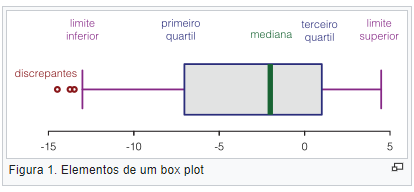

In [ ]:
conn.close() 